In [1]:
import sys
sys.path.insert(0, '../')
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from util import optimiser

import pandas as pd
import seaborn as sns

In [2]:
# the cost function we would like to minimise
def f(x,y):
    return np.mean(3*x**2 + 6*x*y**2 - 2*x**2*y - 7*x*y,axis=0)
# the cost function we would like to minimise
def f2(x,y):
    return np.mean(3*(x**2) + 6*x*y**2 - 2*x**2*y - 7*x*y - 5*x,axis=0)

Text(0.5,1,'True Distribution of Y')

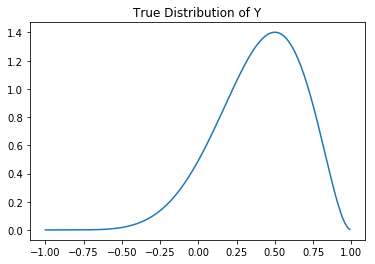

In [12]:
# Define the true distribution
Y = st.beta(a = 7,b=3,loc=-1,scale=2)

# plot the pdf within the range
x = np.arange (-1, 1, 0.01)
z = Y.pdf(x)
plt.plot(x,z)
plt.title("True Distribution of Y")

In [26]:
saa = optimiser.SAA(f)
bagging = optimiser.BaggingSolver(100,
                                  objective_function=f)
mle = optimiser.MLESolver(st.beta,
                          objective_function=f)

methods = [saa,bagging,mle]

In [27]:
df = pd.DataFrame(columns=['w_star','method','function','N'])

In [28]:
n_iter = 300
N = [10,25,50,100]

In [ ]:
for k in range(n_iter):
    for j in range(len(N)):
        samples = Y.rvs(N[j])
        for ele in methods:
            w_star = ele.solve(samples,0.0)[0]
            results = {'w_star': w_star,'method':ele.__str__(),
                   'function':2,'N':N[j]}
            df = df.append(results,ignore_index=True)

In [ ]:
samples = Y.rvs(10000)
w_star = saa.solve(samples,0.0)[0]         
results = {'w_star': w_star,'method':'True','function':1,'N':N[0]}
df = df.append(results,ignore_index=True)

In [ ]:
df['expected_cost'] = df['w_star'].apply(lambda x:f(x,samples))

In [ ]:
ax = sns.lineplot(x=df['N'], y=df['expected_cost'], 
                  hue=df['method'])
plt.plot(N,[df[df['method']=='True']['expected_cost'].iloc[0]]*len(N),
         color='r')

In [ ]:
ax = sns.lineplot(x=df['N'], y=df['w_star'], 
                  hue=df['method'])
plt.plot(N,[df[df['method']=='True']['w_star'].iloc[0]]*3,
         color='r')

In [20]:
df[df['method']=='True']

,w_star,method,function,N,expected_cost
2250,1.451369,True,1,10,2.629681
